In [1]:
import os
#import time

import torch
from torch.utils.data import DataLoader
from models.vae import VqVaeModule
from models.seq2seq import Seq2SeqModule
from datasets import MidiDataset, SeqCollator
from utils import medley_iterator

/home/jching9/miniconda3/envs/melcep/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL = os.getenv('MODEL', '')
ROOT_DIR = os.getenv('ROOT_DIR', './arrange/data')
OUTPUT_DIR = os.getenv('OUTPUT_DIR', './arrange/samples')
DESC_DIR = os.getenv('DESC_DIR', './arrange/desc')
FILE = os.getenv('FILE','./arrange/data/Honestly_Piano_12.mid')
MAX_N_FILES = int(float(os.getenv('MAX_N_FILES', -1)))
MAX_ITER = int(os.getenv('MAX_ITER', 16_000))
MAX_BARS = int(os.getenv('MAX_BARS', 32))
MAKE_MEDLEYS = os.getenv('MAKE_MEDLEYS', 'False') == 'True'
N_MEDLEY_PIECES = int(os.getenv('N_MEDLEY_PIECES', 2))
N_MEDLEY_BARS = int(os.getenv('N_MEDLEY_BARS', 16))
CHECKPOINT = os.getenv('CHECKPOINT', None)
VAE_CHECKPOINT = os.getenv('VAE_CHECKPOINT', None)
BATCH_SIZE = int(os.getenv('BATCH_SIZE', 1))
VERBOSE = int(os.getenv('VERBOSE', 2))

In [3]:
MAKE_MEDLEYS

False

In [4]:
max_bars = MAX_BARS

In [5]:
max_bars

32

In [6]:
OUTPUT_DIR

'./arrange/samples'

In [7]:
params = []

In [8]:
MAX_ITER

16000

In [9]:
params.append(f"max_iter={MAX_ITER}")

In [10]:
params

['max_iter=16000']

In [11]:
MAX_BARS

32

In [12]:
params.append(f"max_bars={MAX_BARS}")

In [13]:
params

['max_iter=16000', 'max_bars=32']

In [14]:
output_dir = os.path.join(OUTPUT_DIR, MODEL, ','.join(params))

In [15]:
output_dir

'./arrange/samples/max_iter=16000,max_bars=32'

In [16]:
print(f"Saving generated files to: {output_dir}")

Saving generated files to: ./arrange/samples/max_iter=16000,max_bars=32


In [17]:
VAE_CHECKPOINT

In [18]:
if VAE_CHECKPOINT:
    print('yes')

In [19]:
MODEL

''

In [20]:
MODEL = 'figaro-expert'

In [21]:
CHECKPOINT='arrange/checkpoints/figaro-expert.ckpt'

In [22]:
vae_module = None

In [23]:
model = Seq2SeqModule.load_from_checkpoint(CHECKPOINT)
model.freeze()
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jching9/ai_melception/arrange/src/arrange/checkpoints/figaro-expert.ckpt'

In [24]:
CHECKPOINT

'arrange/checkpoints/figaro-expert.ckpt'

In [25]:
CHECKPOINT = 'checkpoints/figaro-expert.ckpt'

In [26]:
model = Seq2SeqModule.load_from_checkpoint(CHECKPOINT)
model.freeze()
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jching9/ai_melception/arrange/src/checkpoints/figaro-expert.ckpt'

In [27]:
CHECKPOINT = '../checkpoints/figaro-expert.ckpt'

In [28]:
model = Seq2SeqModule.load_from_checkpoint(CHECKPOINT)
model.freeze()
model.eval()

/home/jching9/miniconda3/envs/melcep/lib/python3.9/site-packages/pytorch_lightning/utilities/migration/migration.py:208: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
Lightning automatically upgraded your loaded checkpoint from v1.4.7 to v2.2.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../checkpoints/figaro-expert.ckpt`


Seq2SeqModule(
  (transformer): EncoderDecoderModel(
    (encoder): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(1, 512, padding_idx=0)
        (position_embeddings): Embedding(1024, 512)
        (token_type_embeddings): Embedding(2, 512)
        (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-3): 4 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=512, out_features=512, bias=True)
                (key): Linear(in_features=512, out_features=512, bias=True)
                (value): Linear(in_features=512, out_features=512, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
                (distance_embedding): Embedding(2047, 64)
              )
              (output): BertSelfOutput(
               

In [29]:
midi_files = [FILE]

In [30]:
midi_files

['./arrange/data/Honestly_Piano_12.mid']

In [31]:
MAX_N_FILES

-1

In [32]:
description_options = None

In [33]:
model.description_flavor

'description'

In [34]:
model.context_size

256

In [35]:
dataset = MidiDataset(
                    midi_files,
                    max_len=-1,
                    description_flavor=model.description_flavor,  # description
                    description_options=description_options,  # none
                    max_bars=model.context_size,  # 256
                    vae_module=vae_module
                    )

In [36]:
dataset

In [37]:
coll = SeqCollator(context_size=-1)

In [38]:
coll

In [39]:
dl = DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=coll)

In [40]:
BATCH_SIZE

1

In [42]:
for batch in dl:
    print(batch)
    break

In [43]:
for batch in dl:
    print(type(batch))
    break

In [44]:
for batch in dl:
    print('1')
    print(type(batch))
    break

In [45]:
dl

In [46]:
with torch.no_grad():
    for batch in dl:
        print(type(batch))
        break

In [49]:
dl = DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=coll)

In [50]:
dl

In [51]:
batch_ = {key: batch[key][:, :1] for key in ['input_ids', 'bar_ids', 'position_ids'] }

NameError: name 'batch' is not defined

In [52]:
for batch in dl:
    batch_ = {key: batch[key][:, :1] for key in ['input_ids', 'bar_ids', 'position_ids'] }
    break

In [55]:
if MAKE_MEDLEYS:  # default False
  max_bars = N_MEDLEY_PIECES * N_MEDLEY_BARS
else:
  max_bars = MAX_BARS  # 32

if OUTPUT_DIR:  # ./arrange/samples
  params = []
  if MAKE_MEDLEYS:
    params.append(f"n_pieces={N_MEDLEY_PIECES}")
    params.append(f"n_bars={N_MEDLEY_BARS}")
  if MAX_ITER > 0:  # max_iter = 16000
    params.append(f"max_iter={MAX_ITER}")  # params = ['max_iter=16000']
  if MAX_BARS > 0:  # max_bars = 32
    params.append(f"max_bars={MAX_BARS}")  # params = ['max_iter=16000', 'max_bars=32']
  output_dir = os.path.join(OUTPUT_DIR, MODEL, ','.join(params))  # './arrange/samples/max_iter=16000,max_bars=32'
else:
  raise ValueError("OUTPUT_DIR must be specified.")

print(f"Saving generated files to: {output_dir}")
if VAE_CHECKPOINT:  # default False
  vae_module = VqVaeModule.load_from_checkpoint(VAE_CHECKPOINT)
  vae_module.cpu()
else:
  vae_module = None

model = Seq2SeqModule.load_from_checkpoint(CHECKPOINT)
model.freeze()
model.eval()
print('------ Load MIDI --------')
midi_files = [FILE]  # ['./arrange/data/Honestly_Piano_12.mid']
if MAX_N_FILES > 0:  # default -1
  midi_files = midi_files[:MAX_N_FILES]

description_options = None
if MODEL in ['figaro-no-inst', 'figaro-no-chord', 'figaro-no-meta']:
  description_options = model.description_options

dataset = MidiDataset(
                      midi_files,
                      max_len=-1,
                      description_flavor=model.description_flavor,  # description
                      description_options=description_options,  # none
                      max_bars=model.context_size,  # 256
                      vae_module=vae_module
                    )

print('------ Read event/description --------')
#start_time = time.time()

coll = SeqCollator(context_size=-1)
dl = DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=coll)
if MAKE_MEDLEYS:
  dl = medley_iterator(dl, 
                      n_pieces=N_MEDLEY_BARS,  ## N_MEDLEY_PIECES??
                      n_bars=N_MEDLEY_BARS, 
                      description_flavor=model.description_flavor
                    )

Saving generated files to: ./arrange/samples/figaro-expert/max_iter=16000,max_bars=32


Lightning automatically upgraded your loaded checkpoint from v1.4.7 to v2.2.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../checkpoints/figaro-expert.ckpt`


------ Load MIDI --------
------ Read event/description --------


In [56]:
with torch.no_grad():
    for batch in dl:
        batch_ = {key: batch[key][:, :initial_context] for key in ['input_ids', 'bar_ids', 'position_ids']}
        break

In [58]:
with torch.no_grad():
    for batch in dl:
        batch_ = {key: batch[key][:, :1] for key in ['input_ids','bar_ids', 'position_ids']}
        break

In [60]:
with torch.no_grad():
    print('1')
    for batch in dl:
        print('2')
        batch_ = {key: batch[key][:, :1] for key in ['input_ids','bar_ids', 'position_ids']}
        break

1


In [61]:
MODEL = os.getenv('MODEL', '')
ROOT_DIR = os.getenv('ROOT_DIR', './arrange/data')
OUTPUT_DIR = os.getenv('OUTPUT_DIR', './arrange/samples')
DESC_DIR = os.getenv('DESC_DIR', './arrange/desc')
FILE = os.getenv('FILE','./arrange/data/Honestly_Piano_12.mid')
MAX_N_FILES = int(float(os.getenv('MAX_N_FILES', -1)))
MAX_ITER = int(os.getenv('MAX_ITER', 16_000))
MAX_BARS = int(os.getenv('MAX_BARS', 32))
MAKE_MEDLEYS = os.getenv('MAKE_MEDLEYS', 'False') == 'True'
N_MEDLEY_PIECES = int(os.getenv('N_MEDLEY_PIECES', 2))
N_MEDLEY_BARS = int(os.getenv('N_MEDLEY_BARS', 16))
CHECKPOINT = os.getenv('CHECKPOINT', None)
VAE_CHECKPOINT = os.getenv('VAE_CHECKPOINT', None)
BATCH_SIZE = int(os.getenv('BATCH_SIZE', 1))
VERBOSE = int(os.getenv('VERBOSE', 2))

In [62]:
CHECKPOINT='../checkpoints/figaro-expert.ckpt'
MODEL='figaro-expert'
FILE='../data/Honestly_Piano_12.midi'

In [63]:
if MAKE_MEDLEYS:  # default False
  max_bars = N_MEDLEY_PIECES * N_MEDLEY_BARS
else:
  max_bars = MAX_BARS  # 32

if OUTPUT_DIR:  # ./arrange/samples
  params = []
  if MAKE_MEDLEYS:
    params.append(f"n_pieces={N_MEDLEY_PIECES}")
    params.append(f"n_bars={N_MEDLEY_BARS}")
  if MAX_ITER > 0:  # max_iter = 16000
    params.append(f"max_iter={MAX_ITER}")  # params = ['max_iter=16000']
  if MAX_BARS > 0:  # max_bars = 32
    params.append(f"max_bars={MAX_BARS}")  # params = ['max_iter=16000', 'max_bars=32']
  output_dir = os.path.join(OUTPUT_DIR, MODEL, ','.join(params))  # './arrange/samples/max_iter=16000,max_bars=32'
else:
  raise ValueError("OUTPUT_DIR must be specified.")

print(f"Saving generated files to: {output_dir}")

Saving generated files to: ./arrange/samples/figaro-expert/max_iter=16000,max_bars=32


In [64]:
if VAE_CHECKPOINT:  # default False
  vae_module = VqVaeModule.load_from_checkpoint(VAE_CHECKPOINT)
  vae_module.cpu()
else:
  vae_module = None

model = Seq2SeqModule.load_from_checkpoint(CHECKPOINT)
model.freeze()
model.eval()
print('------ Load MIDI --------')
midi_files = [FILE]  # ['./arrange/data/Honestly_Piano_12.mid']
if MAX_N_FILES > 0:  # default -1
  midi_files = midi_files[:MAX_N_FILES]

description_options = None
if MODEL in ['figaro-no-inst', 'figaro-no-chord', 'figaro-no-meta']:
  description_options = model.description_options

Lightning automatically upgraded your loaded checkpoint from v1.4.7 to v2.2.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../checkpoints/figaro-expert.ckpt`


------ Load MIDI --------


In [65]:
dataset = MidiDataset(
                      midi_files,
                      max_len=-1,
                      description_flavor=model.description_flavor,  # description
                      description_options=description_options,  # none
                      max_bars=model.context_size,  # 256
                      vae_module=vae_module
                    )

print('------ Read event/description --------')
#start_time = time.time()

coll = SeqCollator(context_size=-1)
dl = DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=coll)
if MAKE_MEDLEYS:
  dl = medley_iterator(dl, 
                      n_pieces=N_MEDLEY_BARS,  ## N_MEDLEY_PIECES??
                      n_bars=N_MEDLEY_BARS, 
                      description_flavor=model.description_flavor
                    )

------ Read event/description --------


In [67]:
for batch in dl:
    print(batch)
    break

{'input_ids': tensor([[   2,  605,   14, 1116, 1293, 1116,  104, 1116,  129,  321,  545,  548,
         1119,  129,  324,  545,  548, 1122,  129,  324,  545,  551, 1128, 1298,
         1128,  129,  324,  545,  551, 1134,  129,  321,  545,  548, 1137,  129,
          326,  545,  551, 1143,  129,  324,  545,  551, 1161,  129,  319,  545,
          548,  606,   14, 1116, 1298, 1116,  104, 1116,  129,  321,  545,  548,
         1119,  129,  324,  545,  548, 1122,  129,  324,  545,  551, 1128, 1277,
         1128,  129,  324,  545,  548, 1131,  129,  326,  545,  554, 1140,  129,
          321,  545,  557, 1161,  129,  319,  545,  548,  607,   14, 1116, 1277,
         1116,  104, 1116,  129,  319,  545,  565, 1116,  129,  322,  545,  551,
         1122,  129,  322,  545,  551, 1128,  129,  322,  545,  551, 1134,  129,
          324,  545,  548, 1137,  129,  326,  545,  554, 1140, 1264, 1146,  129,
          324,  545,  551, 1152,  129,  317,  545,  548, 1152,  129,  321,  545,
          548,

In [68]:
batch_ = {key: batch[key][:, :1] for key in ['input_ids', 'bar_ids', 'position_ids']}

In [69]:
batch_

{'input_ids': tensor([[2]]),
 'bar_ids': tensor([[0]]),
 'position_ids': tensor([[0]], dtype=torch.int32)}

In [70]:
with torch.no_grad():
    for batch in dl:
        break

In [71]:
batch_ = {key: batch[key][:, :1] for key in ['input_ids', 'bar_ids', 'position_ids']}

In [72]:
batch_

{'input_ids': tensor([[2]]),
 'bar_ids': tensor([[0]]),
 'position_ids': tensor([[0]], dtype=torch.int32)}

In [73]:
batch_['description'] = batch['description']
batch_['desc_bar_ids'] = batch['desc_bar_ids']

In [74]:
batch_

{'input_ids': tensor([[2]]),
 'bar_ids': tensor([[0]]),
 'position_ids': tensor([[0]], dtype=torch.int32),
 'description': tensor([[  2, 454,  14, 321, 386, 403, 452,  96, 257, 262, 455,  14, 321, 386,
          403, 452,  96, 262, 241, 456,  14, 322, 386, 403, 452,  96, 241, 228,
          457,  14, 321, 386, 402, 452,  96, 228, 302, 458,  14, 322, 386, 403,
          452,  96, 302, 459,  14, 321, 386, 402, 452,  96, 302, 246, 460,  14,
          322, 386, 403, 452,  96, 246, 264, 461,  14, 321, 386, 403, 452,  96,
          264, 313, 462,  14, 322, 386, 403, 452,  96, 302, 224, 463,  14, 322,
          386, 402, 452,  96, 313, 264, 464,  14, 322, 386, 403, 452,  96, 269,
          224, 257, 465,  14, 322, 386, 403, 452,  96, 280, 264, 320,   3]],
        dtype=torch.int32),
 'desc_bar_ids': tensor([[ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
           2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
           4,  5,  5,  5,  5,  5,

In [75]:
DESC_DIR

'./arrange/desc'

In [76]:
DESC_DIR = '../desc'

In [77]:
if DESC_DIR:
  os.makedirs(DESC_DIR, exist_ok=True)

In [78]:
file_path = DESC_DIR + '/description_trace.txt'

In [79]:
prefix_condition = 'Bar_'

In [80]:
for i in range(len(batch['desc_events'][0]) - 1):
      item = batch['desc_events'][0][i]
      break

In [81]:
item

'Bar_1'

In [82]:
batch['desc_events']

[['Bar_1',
  'Time Signature_4/4',
  'Note Density_0',
  'Mean Velocity_32',
  'Mean Pitch_16',
  'Mean Duration_32',
  'Instrument_Bright Acoustic Piano',
  'Chord_E:min',
  'Chord_E:min7',
  'Bar_2',
  'Time Signature_4/4',
  'Note Density_0',
  'Mean Velocity_32',
  'Mean Pitch_16',
  'Mean Duration_32',
  'Instrument_Bright Acoustic Piano',
  'Chord_E:min7',
  'Chord_D:min',
  'Bar_3',
  'Time Signature_4/4',
  'Note Density_1',
  'Mean Velocity_32',
  'Mean Pitch_16',
  'Mean Duration_32',
  'Instrument_Bright Acoustic Piano',
  'Chord_D:min',
  'Chord_C:dom7',
  'Bar_4',
  'Time Signature_4/4',
  'Note Density_0',
  'Mean Velocity_32',
  'Mean Pitch_15',
  'Mean Duration_32',
  'Instrument_Bright Acoustic Piano',
  'Chord_C:dom7',
  'Chord_A:min7',
  'Bar_5',
  'Time Signature_4/4',
  'Note Density_1',
  'Mean Velocity_32',
  'Mean Pitch_16',
  'Mean Duration_32',
  'Instrument_Bright Acoustic Piano',
  'Chord_A:min7',
  'Bar_6',
  'Time Signature_4/4',
  'Note Density_0',
  'Mea

In [83]:
batch.keys()

dict_keys(['input_ids', 'labels', 'desc_events', 'position_ids', 'bar_ids', 'description', 'desc_bar_ids', 'files'])

In [84]:
batch['labels']

tensor([[ 605,   14, 1116, 1293, 1116,  104, 1116,  129,  321,  545,  548, 1119,
          129,  324,  545,  548, 1122,  129,  324,  545,  551, 1128, 1298, 1128,
          129,  324,  545,  551, 1134,  129,  321,  545,  548, 1137,  129,  326,
          545,  551, 1143,  129,  324,  545,  551, 1161,  129,  319,  545,  548,
          606,   14, 1116, 1298, 1116,  104, 1116,  129,  321,  545,  548, 1119,
          129,  324,  545,  548, 1122,  129,  324,  545,  551, 1128, 1277, 1128,
          129,  324,  545,  548, 1131,  129,  326,  545,  554, 1140,  129,  321,
          545,  557, 1161,  129,  319,  545,  548,  607,   14, 1116, 1277, 1116,
          104, 1116,  129,  319,  545,  565, 1116,  129,  322,  545,  551, 1122,
          129,  322,  545,  551, 1128,  129,  322,  545,  551, 1134,  129,  324,
          545,  548, 1137,  129,  326,  545,  554, 1140, 1264, 1146,  129,  324,
          545,  551, 1152,  129,  317,  545,  548, 1152,  129,  321,  545,  548,
         1155,  129,  315,  

In [1]:
import numpy as np
file = open('./rhythm_intensity.txt','r')
all_line = np.array([])
for line in file:
    line = line.strip()
    all_line = np.append(all_line, line)


In [18]:
DEFAULT_RHYTHM_INTENSITY = [0.2, 0.25, 0.32, 0.38, 0.44, 0.5, 0.63]
count = [0,0,0,0,0,0,0,0]
inds = np.digitize(all_line, DEFAULT_RHYTHM_INTENSITY)

In [19]:
for idx in inds:
    count[idx] += 1

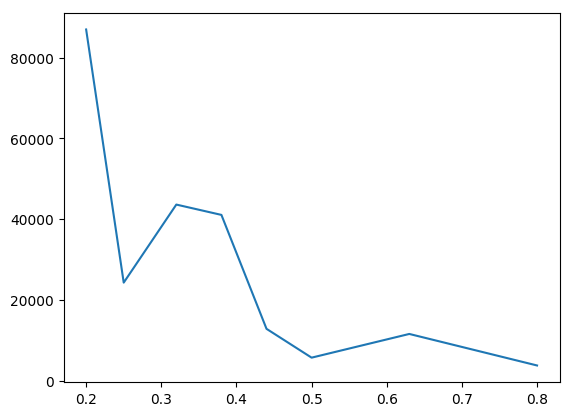

In [21]:
import matplotlib.pyplot as plt
DEFAULT_RHYTHM_INTENSITY = [0.2, 0.25, 0.32, 0.38, 0.44, 0.5, 0.63, 0.8]
plt.plot(DEFAULT_RHYTHM_INTENSITY, count)